In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "/Users/chris/projects/Nature2023MooneyScripts/results/roi_based_encoding_similarity/counterfactual-post/performance_detailed.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,roi_name,roi_size,percentage_significant,score_type,all_mean_score,all_median_score,all_variance_score,all_max_score,significant_mean_score,significant_median_score,significant_variance_score,significant_max_score
0,DMN_MPFC,723,0.233748,Control score,0.292116,0.288640,0.001083,0.402644,0.266392,0.264745,0.001679,0.402644
1,DMN_MPFC,723,0.233748,Encoding score,0.239610,0.239909,0.000748,0.326401,0.237947,0.235229,0.001491,0.367848
2,DMN_PCC,3231,0.170845,Control score,0.258278,0.265891,0.002351,0.374916,0.233643,0.239144,0.002836,0.374916
3,DMN_PCC,3231,0.170845,Encoding score,0.200813,0.203524,0.002520,0.325694,0.199545,0.203180,0.003100,0.333918
4,DMN_PL,1879,0.092602,Control score,0.183210,0.187071,0.001025,0.286901,0.191828,0.189074,0.001849,0.326750


In [4]:
df["roi_name"].unique()

array(['DMN_MPFC', 'DMN_PCC', 'DMN_PL', 'DMN_PR', 'FG_L', 'FG_R',
       'FPN_FL', 'FPN_FR', 'FPN_PL', 'FPN_PR', 'LO1', 'LO2', 'v1', 'v2',
       'v3', 'hv4', 'IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL',
       'parietal_operculum', 'superior_parietal_lobule'], dtype=object)

In [36]:
cute_names_loc = ["LO1", "LO2"]
cute_names_fg = ["FG_L", "FG_R"]

cute_names_early_visual = ["v1", "v2", "v3", "hv4"]
cute_names_dmn = ["DMN_MPFC", "DMN_PCC", "DMN_PL", "DMN_PR"]
cute_names_fpn = ["FPN_FL", "FPN_FR", "FPN_PL", "FPN_PR"]

# Add left and right
all_cute_names = cute_names_early_visual + cute_names_fg + cute_names_loc + cute_names_dmn + cute_names_fpn

## Add ROI group and convert to cute names

In [42]:
df["ROI group"] = ""
# Add description of large ROI
for row in range(len(df)):
    roi = df.loc[row, "roi_name"]

    if roi in cute_names_early_visual:
        df.loc[row, "ROI group"] = "EVC"
    elif roi in cute_names_fg:
        df.loc[row, "ROI group"] = "FG"
    elif roi in cute_names_loc:
        df.loc[row, "ROI group"] = "LOC"
    elif roi in cute_names_dmn:
        df.loc[row, "ROI group"] = "DMN"
    elif roi in cute_names_fpn:
        df.loc[row, "ROI group"] = "FPN"

In [43]:
df.head()

,roi_name,roi_size,percentage_significant,score_type,all_mean_score,all_median_score,all_variance_score,all_max_score,significant_mean_score,significant_median_score,significant_variance_score,significant_max_score,ROI group
0,DMN_MPFC,723,0.233748,Control score,0.292116,0.288640,0.001083,0.402644,0.266392,0.264745,0.001679,0.402644,DMN
1,DMN_MPFC,723,0.233748,Encoding score,0.239610,0.239909,0.000748,0.326401,0.237947,0.235229,0.001491,0.367848,DMN
2,DMN_PCC,3231,0.170845,Control score,0.258278,0.265891,0.002351,0.374916,0.233643,0.239144,0.002836,0.374916,DMN
3,DMN_PCC,3231,0.170845,Encoding score,0.200813,0.203524,0.002520,0.325694,0.199545,0.203180,0.003100,0.333918,DMN
4,DMN_PL,1879,0.092602,Control score,0.183210,0.187071,0.001025,0.286901,0.191828,0.189074,0.001849,0.326750,DMN


In [44]:
selected_df = df[df['roi_name'].isin(all_cute_names)]

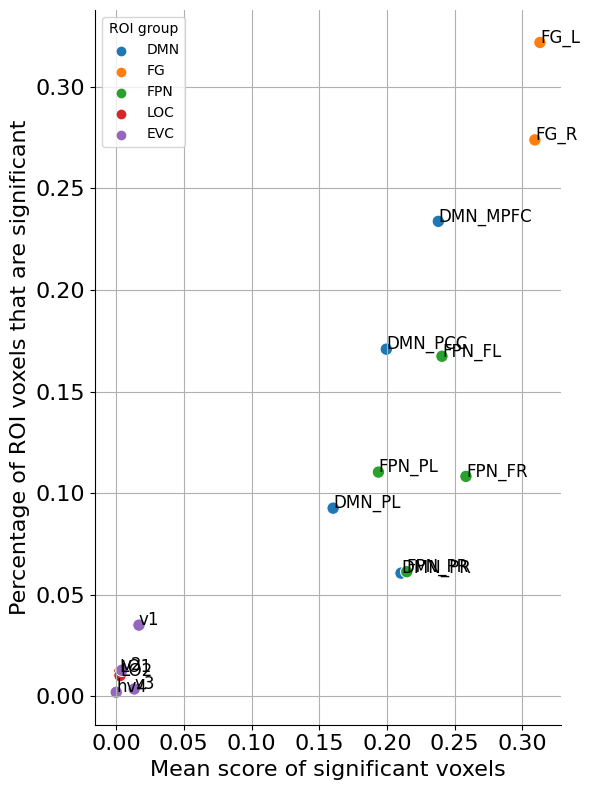

In [45]:
plt.figure(figsize=(6, 8))
sns.scatterplot(data=selected_df[selected_df["score_type"] == "Encoding score"], y="percentage_significant", x="significant_mean_score", s=80, hue="ROI group")

# Turn off spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.xlabel("Mean score of significant voxels", fontsize=16)
plt.ylabel("Percentage of ROI voxels that are significant", fontsize=16)

# Larger font size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Turn on grid
plt.grid(True)

# Add text
for i, txt in enumerate(all_cute_names):
    x = selected_df[(selected_df['roi_name'] == txt) & (selected_df["score_type"] == "Encoding score")]['significant_mean_score']
    y = selected_df[(selected_df['roi_name'] == txt) & (selected_df["score_type"] == "Encoding score")]['percentage_significant']

    default_fontsize = 12
    fine_adjustments = {
    }

    if txt in fine_adjustments:
        fine_adjustments = fine_adjustments[txt]
        plt.text(x + fine_adjustments[0], y + fine_adjustments[1], fine_adjustments[3], fontsize=default_fontsize+fine_adjustments[2])
    else:
        plt.text(x, y, txt, fontsize=default_fontsize)

# Legend lower left
# Tight box
plt.tight_layout()

plt.savefig("/Users/chris/Desktop/roi.png", dpi=1200)
None

/var/folders/js/6gw33t_51rqcvbmgmlr5ybtw0000gn/T/ipykernel_89685/1512981938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['roi_name'] = pd.Categorical(selected_df['roi_name'], categories=all_cute_names, ordered=True)


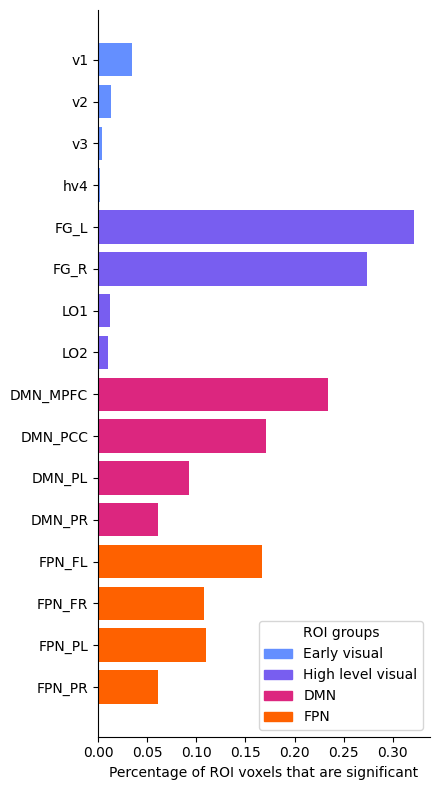

In [46]:
plt.figure(figsize=(4.5, 8))

# Sort the rows by ROI name's appearance in all_cute_names
selected_df['roi_name'] = pd.Categorical(selected_df['roi_name'], categories=all_cute_names, ordered=True)
selected_df = selected_df.sort_values('roi_name')

individual_colors = ["#648fff", "#785ef0", "#dc267f", "#fe6100"]
colors = [individual_colors[0]] * len(cute_names_early_visual) + [individual_colors[1]] * len(cute_names_late_visual) + [individual_colors[2]] * len(cute_names_dmn) + [individual_colors[3]] * len(cute_names_fpn)

# Add a legend for it, with a small note on top saying "ROI groups"
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=color, label=group) for color, group in zip(individual_colors, ["Early visual", "High level visual", "DMN", "FPN"])], title="ROI groups", loc="lower right")

plt.barh(
    list(selected_df[selected_df["score_type"] == "Encoding score"]['roi_name'][::-1]),
    list(selected_df[selected_df["score_type"] == "Encoding score"]['percentage_significant'][::-1]),
    color=colors[::-1] + ["k"]
)

plt.xlabel("Percentage of ROI voxels that are significant")

# Make sure boundaries are tight
plt.tight_layout()

# Remove spines
plt.gca().spines[['top', 'right']].set_visible(False)
plt.savefig("/Users/chris/Desktop/roi_ranking.png", dpi=1200)

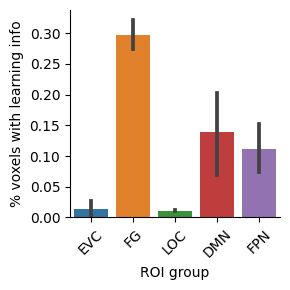

In [56]:
plt.figure(figsize=(3, 3))

# Sort the rows by ROI name's appearance in all_cute_names
selected_df['roi_name'] = pd.Categorical(selected_df['roi_name'], categories=all_cute_names, ordered=True)
selected_df = selected_df.sort_values('roi_name')

sns.barplot(data=selected_df[selected_df["score_type"] == "Encoding score"], y="percentage_significant", x="ROI group")

plt.ylabel("% voxels with learning info")

# Make sure boundaries are tight
plt.xticks(rotation=45)
plt.tight_layout()

# Remove spines
plt.gca().spines[['top', 'right']].set_visible(False)
plt.savefig("/Users/chris/Desktop/roi_ranking.png", dpi=1200)

In [62]:
selected_df[selected_df["score_type"] == "Encoding score"].groupby("ROI group").agg("mean")["percentage_significant"]

/var/folders/js/6gw33t_51rqcvbmgmlr5ybtw0000gn/T/ipykernel_89685/3059106786.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  selected_df[selected_df["score_type"] == "Encoding score"].groupby("ROI group").agg("mean")["percentage_significant"]


ROI group
DMN    0.139457
EVC    0.013386
FG     0.297799
FPN    0.111827
LOC    0.011067
Name: percentage_significant, dtype: float64